## Useful functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from main import *

## One run plots:

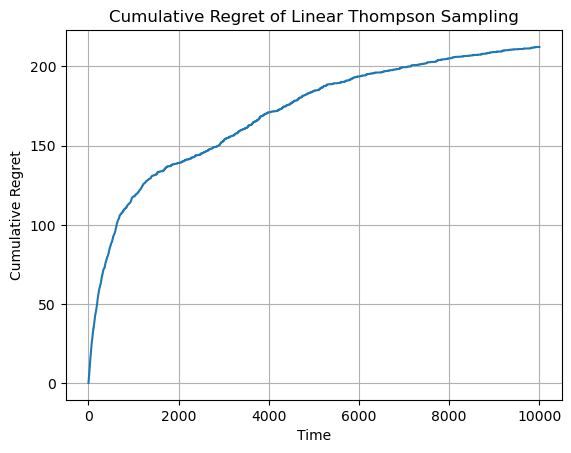

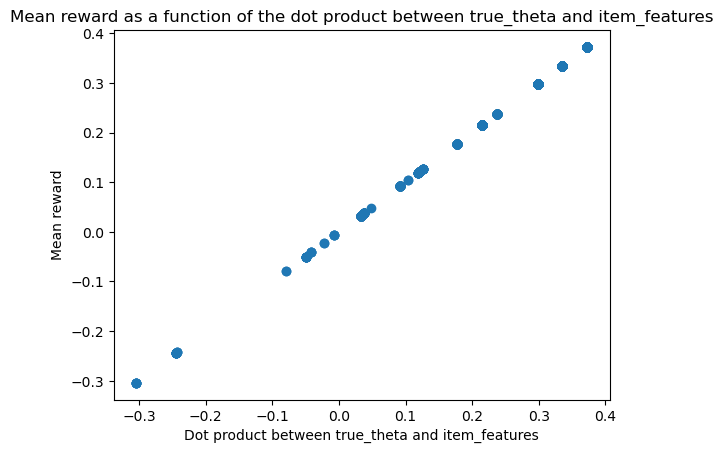

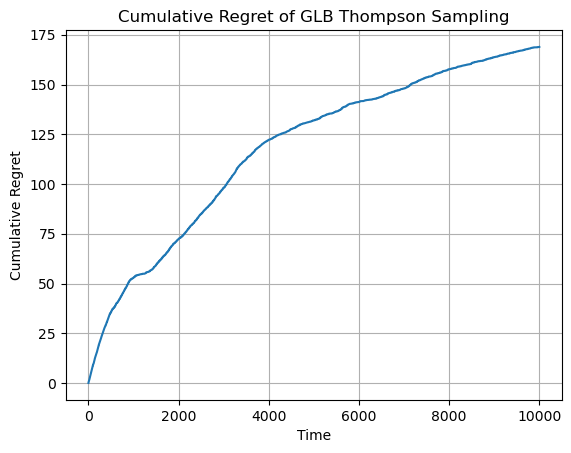

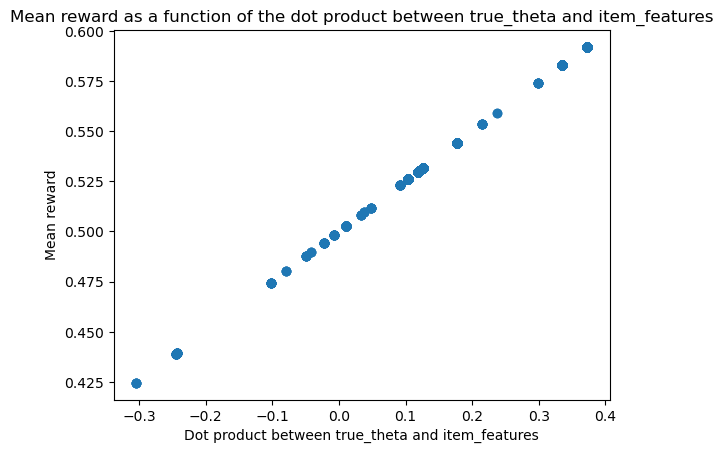

In [2]:
# Initialize the environment and the bandit.
d = 5
num_items = 30
num_rounds = 10000
sigma_noise = 1.0

# Generate random item_features with values between -1 and 1
item_features = np.random.uniform(low=-1, high=1, size=(num_items, d))

# Generate a random true_theta with values between -1 and 1
true_theta = np.random.uniform(low=-1, high=1, size=d)/d

regrets, errors, dot_products, mean_rewards = run_thompson_sampling(d, item_features, true_theta, num_rounds, sigma_noise, alpha=1, type = 'linear')
plot_regret(regrets, "Cumulative Regret of Linear Thompson Sampling")
plot_dot_products_and_mean_rewards(dot_products, mean_rewards)

num_rounds = 10000
regrets2, errors2, dot_products2, mean_rewards2 = run_thompson_sampling(d, item_features, true_theta, num_rounds, sigma_noise, alpha=1, type = 'logistic')
plot_regret(regrets2, "Cumulative Regret of GLB Thompson Sampling")
plot_dot_products_and_mean_rewards(dot_products2, mean_rewards2)

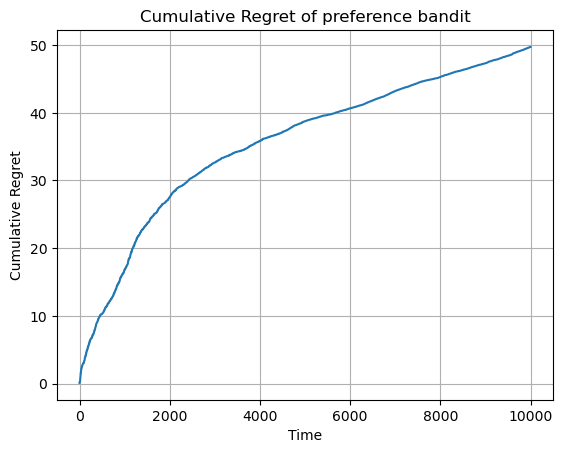

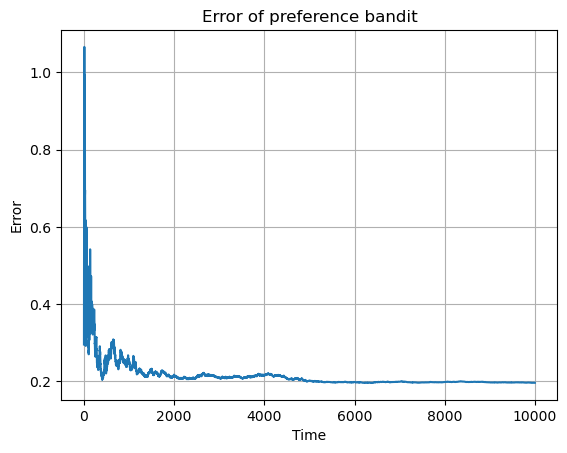

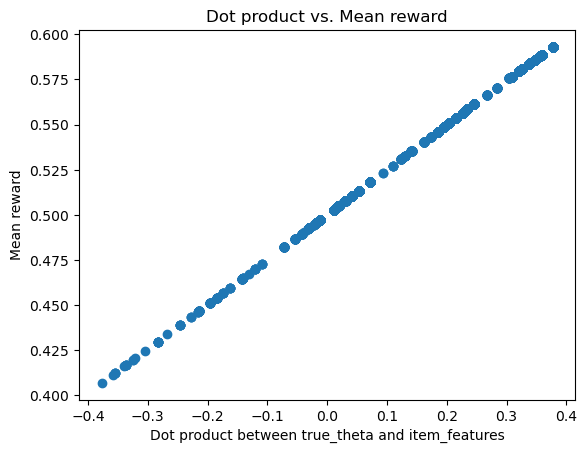

In [3]:
# Initialize the environment and the bandit.
d = 5
num_items = 10
num_rounds = 10000
sigma_noise = 1.0

# Generate random item_features with values between -1 and 1
item_features = np.random.uniform(low=-1, high=1, size=(num_items, d))
item_features[:,-1] = 1 # Set the last feature to 1 for all items

# Generate a random true_theta with values between -1 and 1
true_theta = np.random.uniform(low=-1, high=1, size=d)/d

regrets, errors, dot_products, mean_rewards = run_thompson_sampling(d, item_features, true_theta, num_rounds, sigma_noise, alpha=1, type = 'preference')
plot_regret(regrets, "Cumulative Regret of preference bandit")
plot_error(errors, "Error of preference bandit")

# Plot the dot_products as the X_axis and the mean_rewards as the Y_axis
plt.scatter(dot_products, mean_rewards)
plt.xlabel("Dot product between true_theta and item_features")
plt.ylabel("Mean reward")
plt.title("Dot product vs. Mean reward")
plt.show()

## Preference Bandit experiments over 10 runs

### Witness experiment

Runs progress:   0%|          | 0/10 [00:00<?, ?it/s]

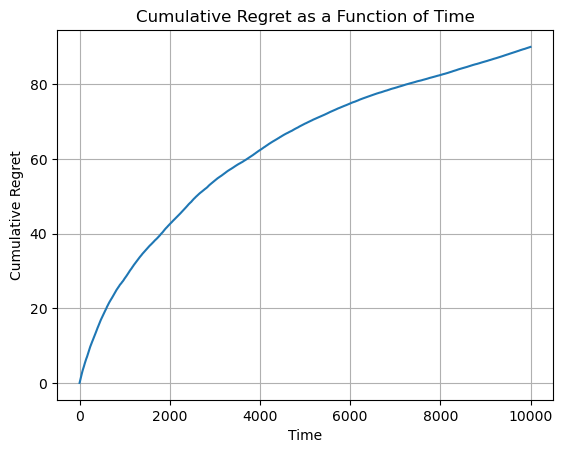

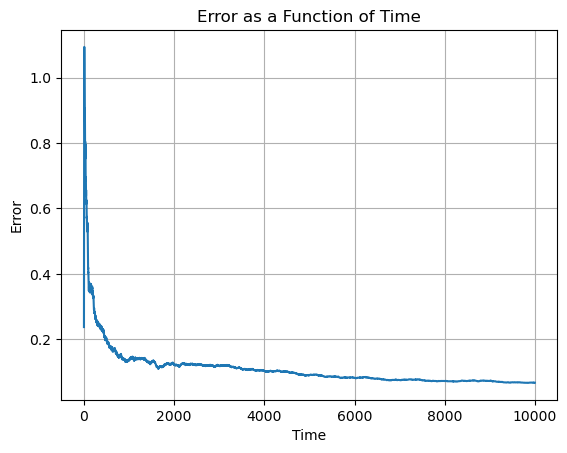

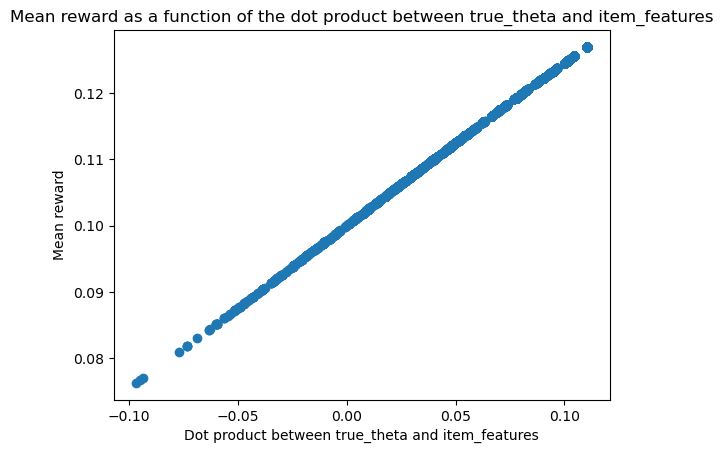

In [4]:
run_and_plot_thompson_sampling(d, item_features, true_theta, num_rounds, sigma_noise, nbr_runs=10, alpha=1, type = 'preference')

## Changing the last component of true_theta

Runs progress:   0%|          | 0/10 [00:00<?, ?it/s]

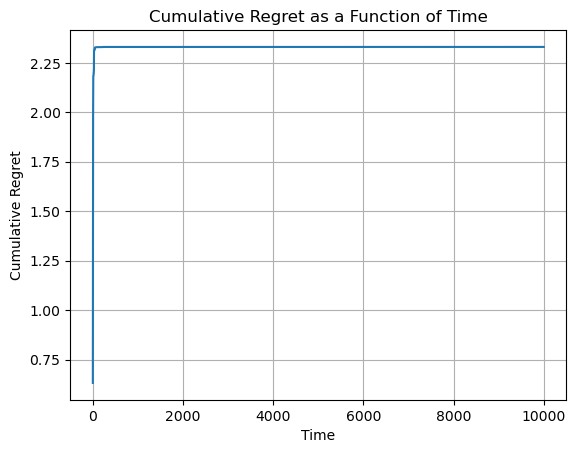

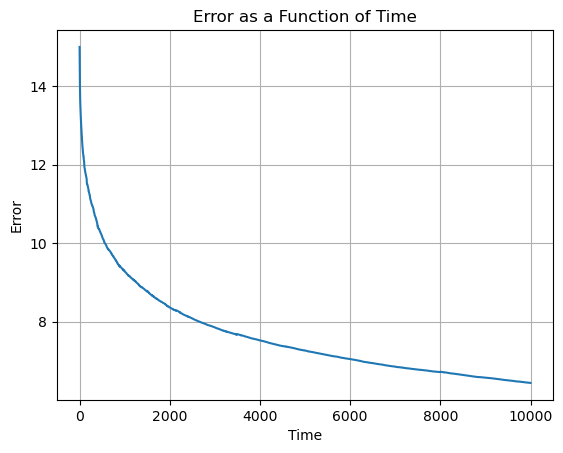

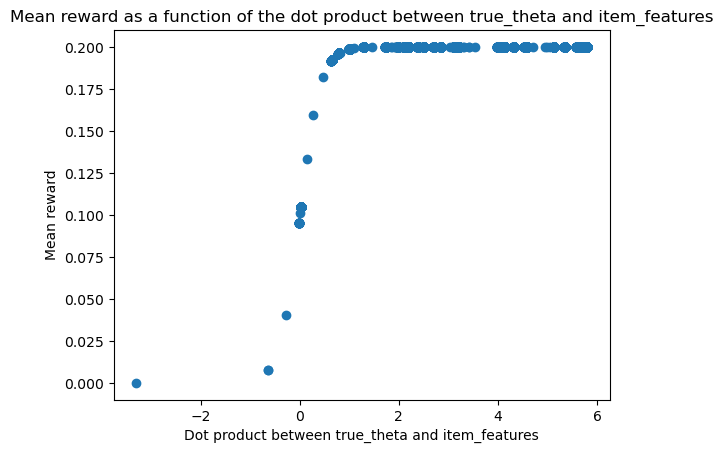

In [6]:
true_theta_v2 = true_theta
true_theta_v2[-1] = 15
run_and_plot_thompson_sampling(d, item_features, true_theta_v2, num_rounds, sigma_noise, nbr_runs=10, alpha=1, type = 'preference')

Runs progress:   0%|          | 0/10 [00:00<?, ?it/s]

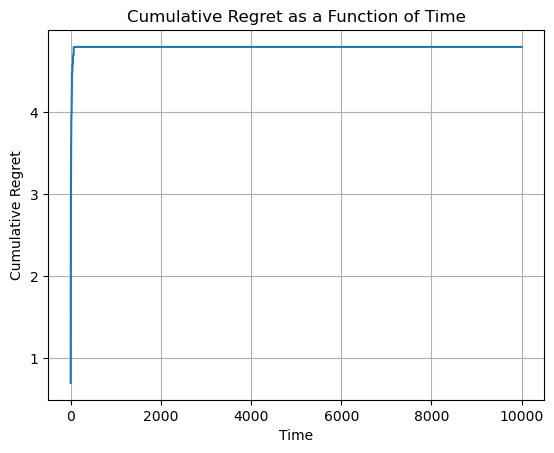

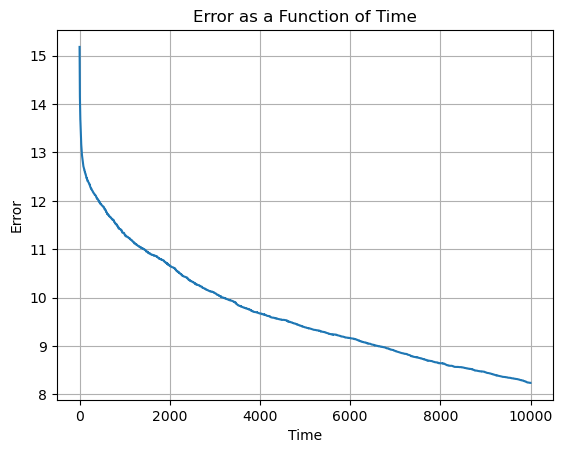

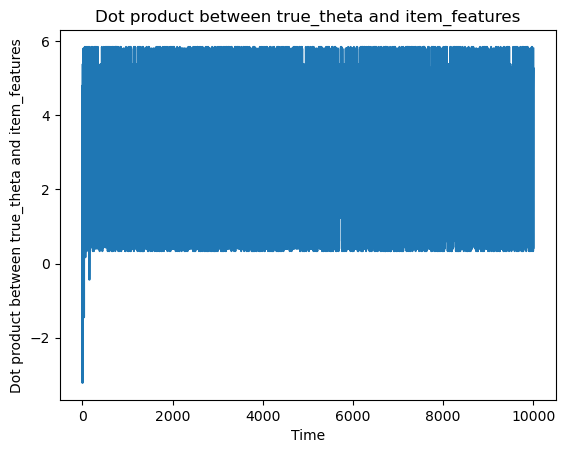

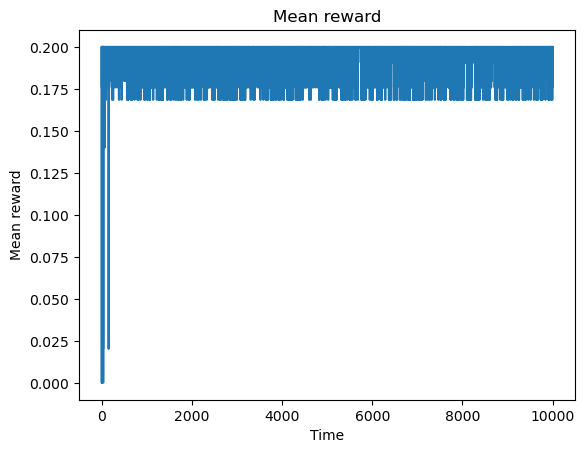

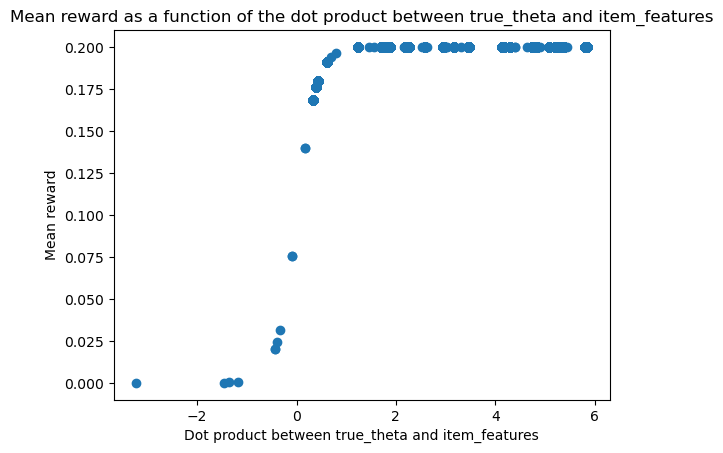

In [5]:
true_theta_v2 = true_theta
true_theta_v2[-1] = -15
run_and_plot_thompson_sampling(d, item_features, true_theta_v2, num_rounds, sigma_noise, nbr_runs=10, alpha=1, type = 'preference')

In [3]:
# Initialize the true_theta array that is true_theta with the last element set from [-20, -10, -5, 5, 10, 20]
d = 5
original_true_theta = np.random.uniform(low=-1, high=1, size=d)/d
last_component_values = [5, 10, 15]
true_theta_array = np.zeros((len(last_component_values), d))
for i in range(len(last_component_values)):
    true_theta = original_true_theta.copy() # Use copy to avoid modifying original_true_theta
    true_theta[-1] = last_component_values[i]
    true_theta_array[i] = true_theta


[[-7.07169891e-02  1.22108465e-01 -5.14867203e-02  1.66218545e-03
   5.00000000e+00]
 [-7.07169891e-02  1.22108465e-01 -5.14867203e-02  1.66218545e-03
   1.00000000e+01]
 [-7.07169891e-02  1.22108465e-01 -5.14867203e-02  1.66218545e-03
   1.50000000e+01]]


Total progress:   0%|          | 0/6 [00:00<?, ?it/s]

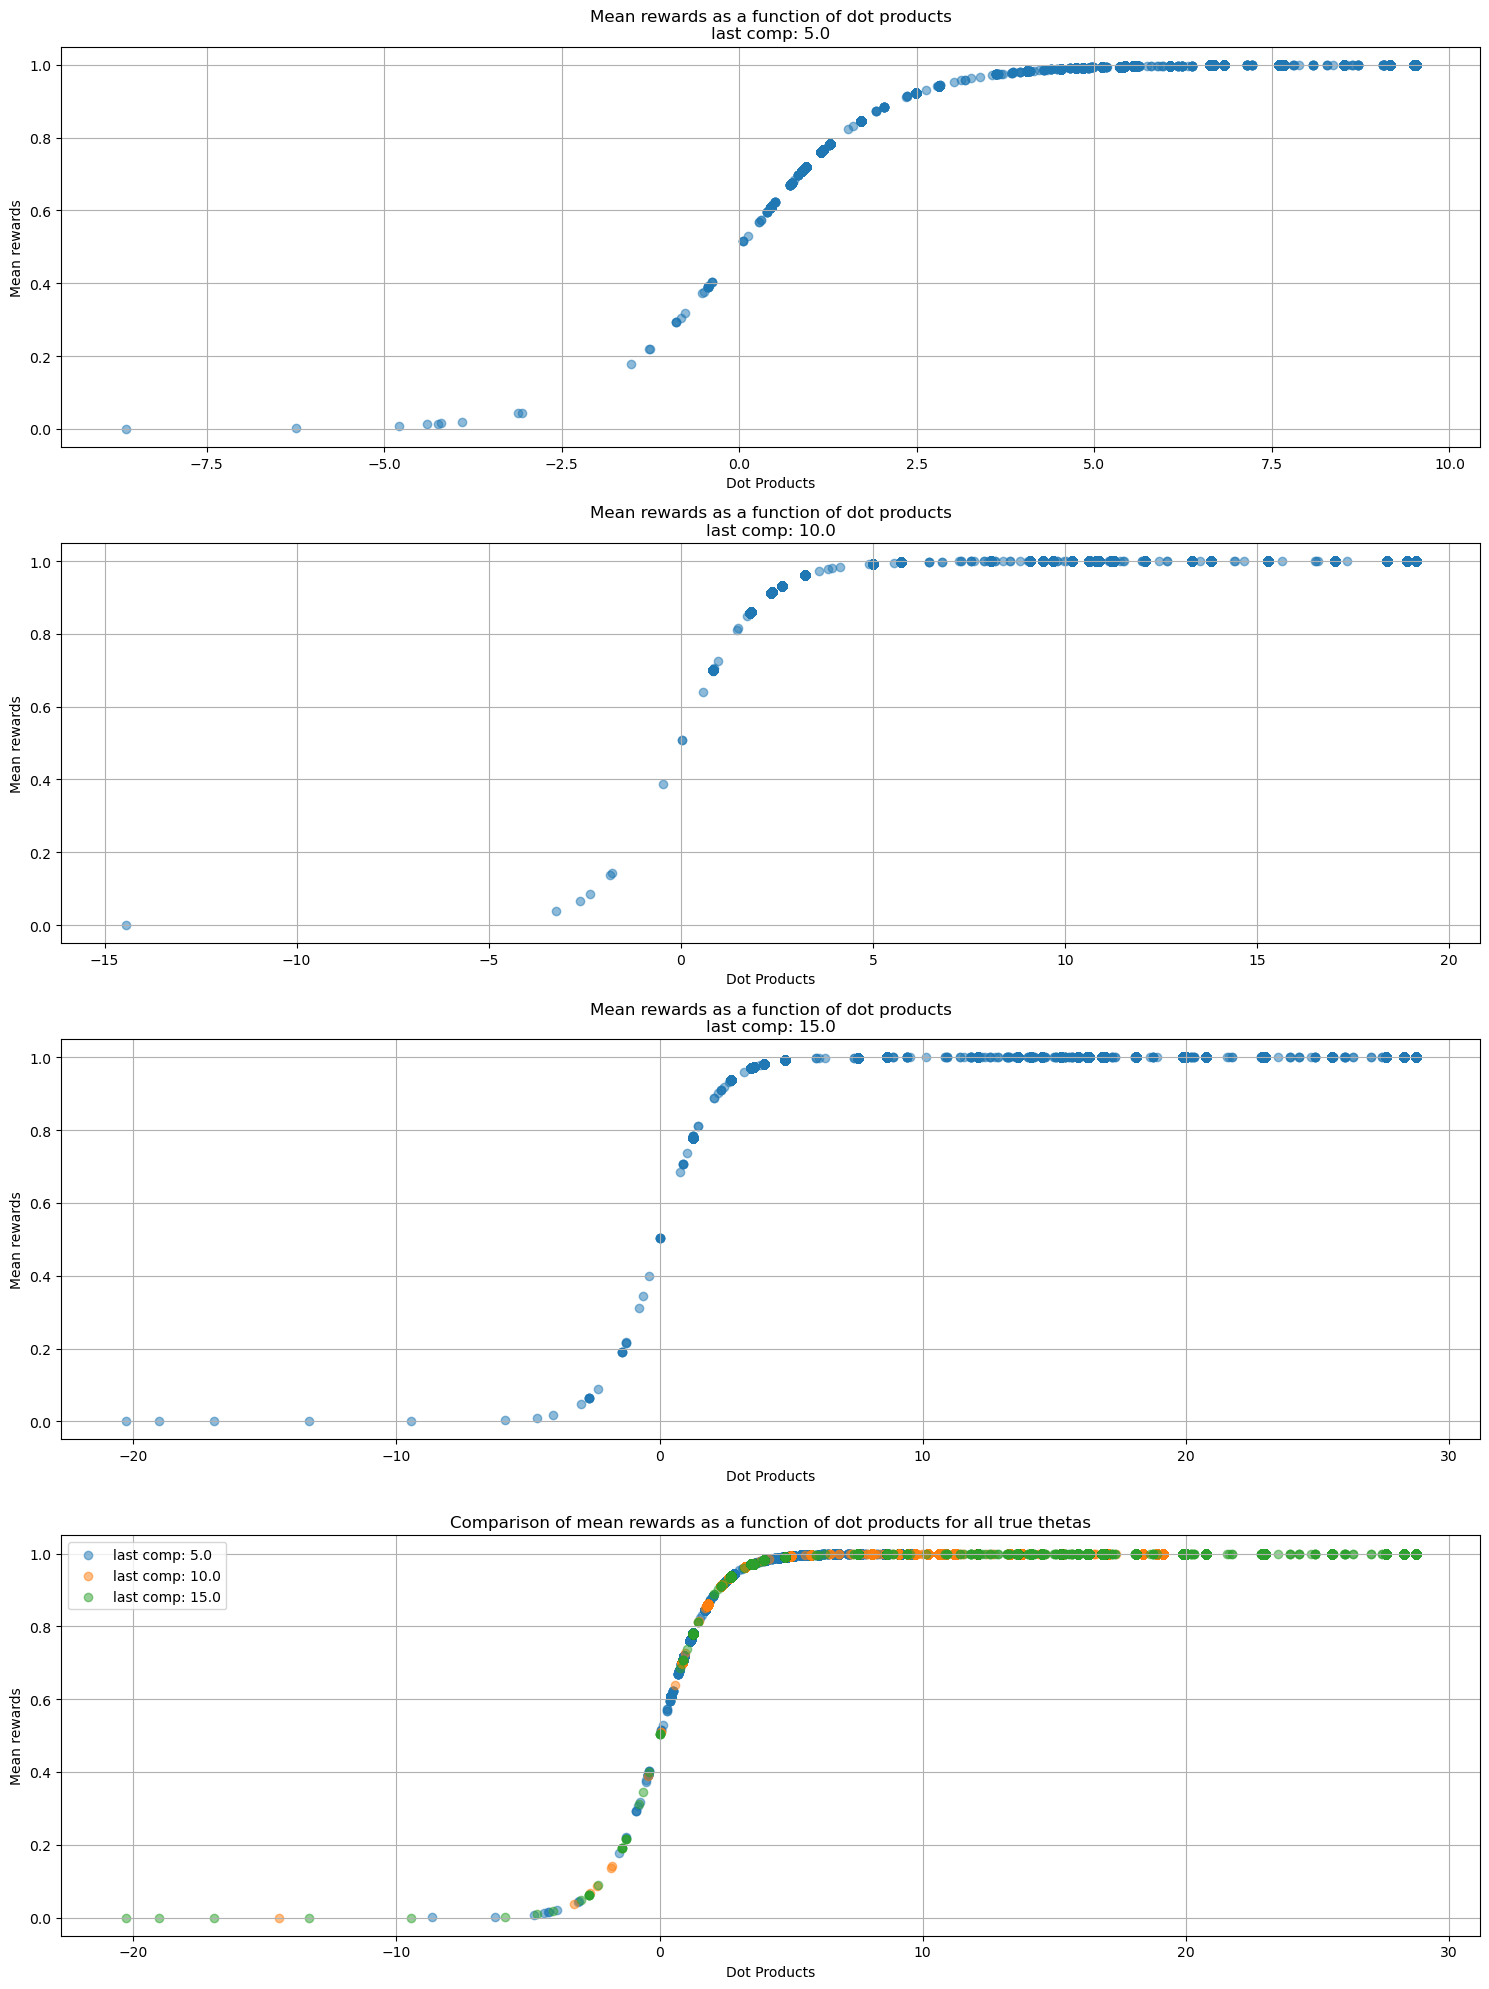

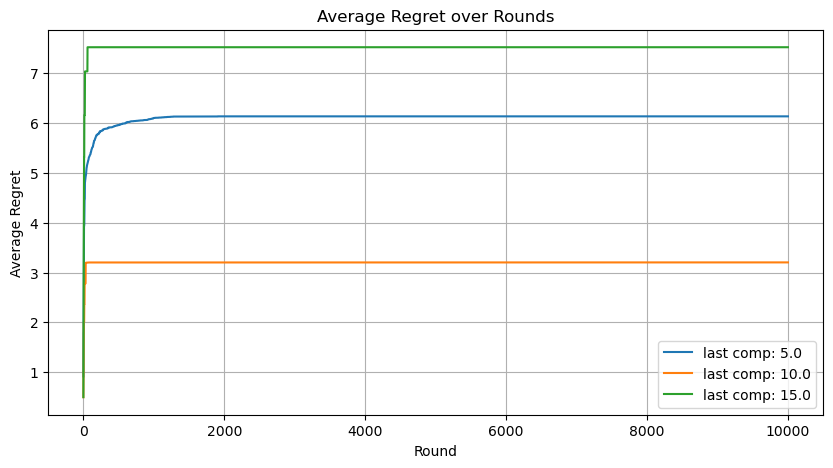

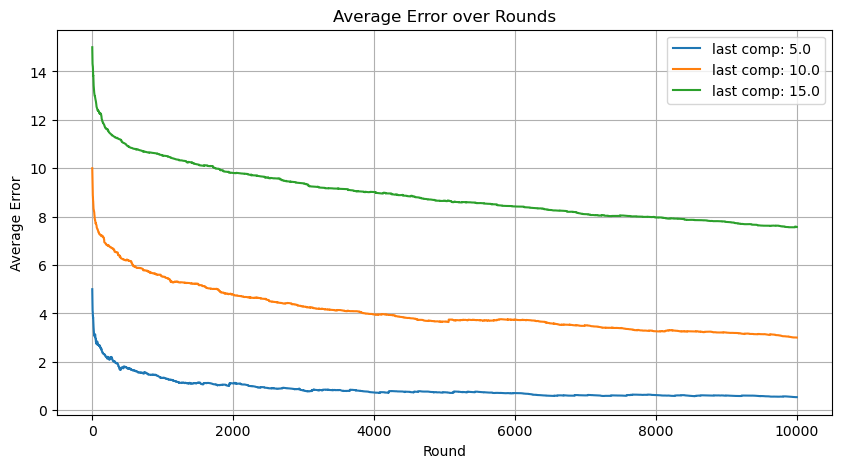

In [4]:
print(true_theta_array)
true_thetas = []
run_preference_experiment(d, item_features, true_theta_array, num_rounds, sigma_noise, nbr_runs=2, alpha=1, type = 'preference')

## Changing the norm of true_theta

In [5]:
# Initialize the true_theta array that is true_theta but scaled by a factor s
d = 5
original_true_theta = np.random.uniform(low=-1, high=1, size=d)/d
scale_factors = [0.1, 1, 5, 10]
true_theta_array = np.zeros((len(scale_factors), d))
for i in range(len(scale_factors)):
    true_theta = original_true_theta.copy() # Use copy to avoid modifying original_true_theta
    true_theta *= scale_factors[i]
    true_theta_array[i] = true_theta

[[ 1.74767689e-02 -1.11942390e-03  1.99332207e-02  1.53046471e-02
   1.09234509e-02]
 [ 1.74767689e-01 -1.11942390e-02  1.99332207e-01  1.53046471e-01
   1.09234509e-01]
 [ 8.73838444e-01 -5.59711950e-02  9.96661037e-01  7.65232356e-01
   5.46172546e-01]
 [ 1.74767689e+00 -1.11942390e-01  1.99332207e+00  1.53046471e+00
   1.09234509e+00]]


Total progress:   0%|          | 0/20 [00:00<?, ?it/s]

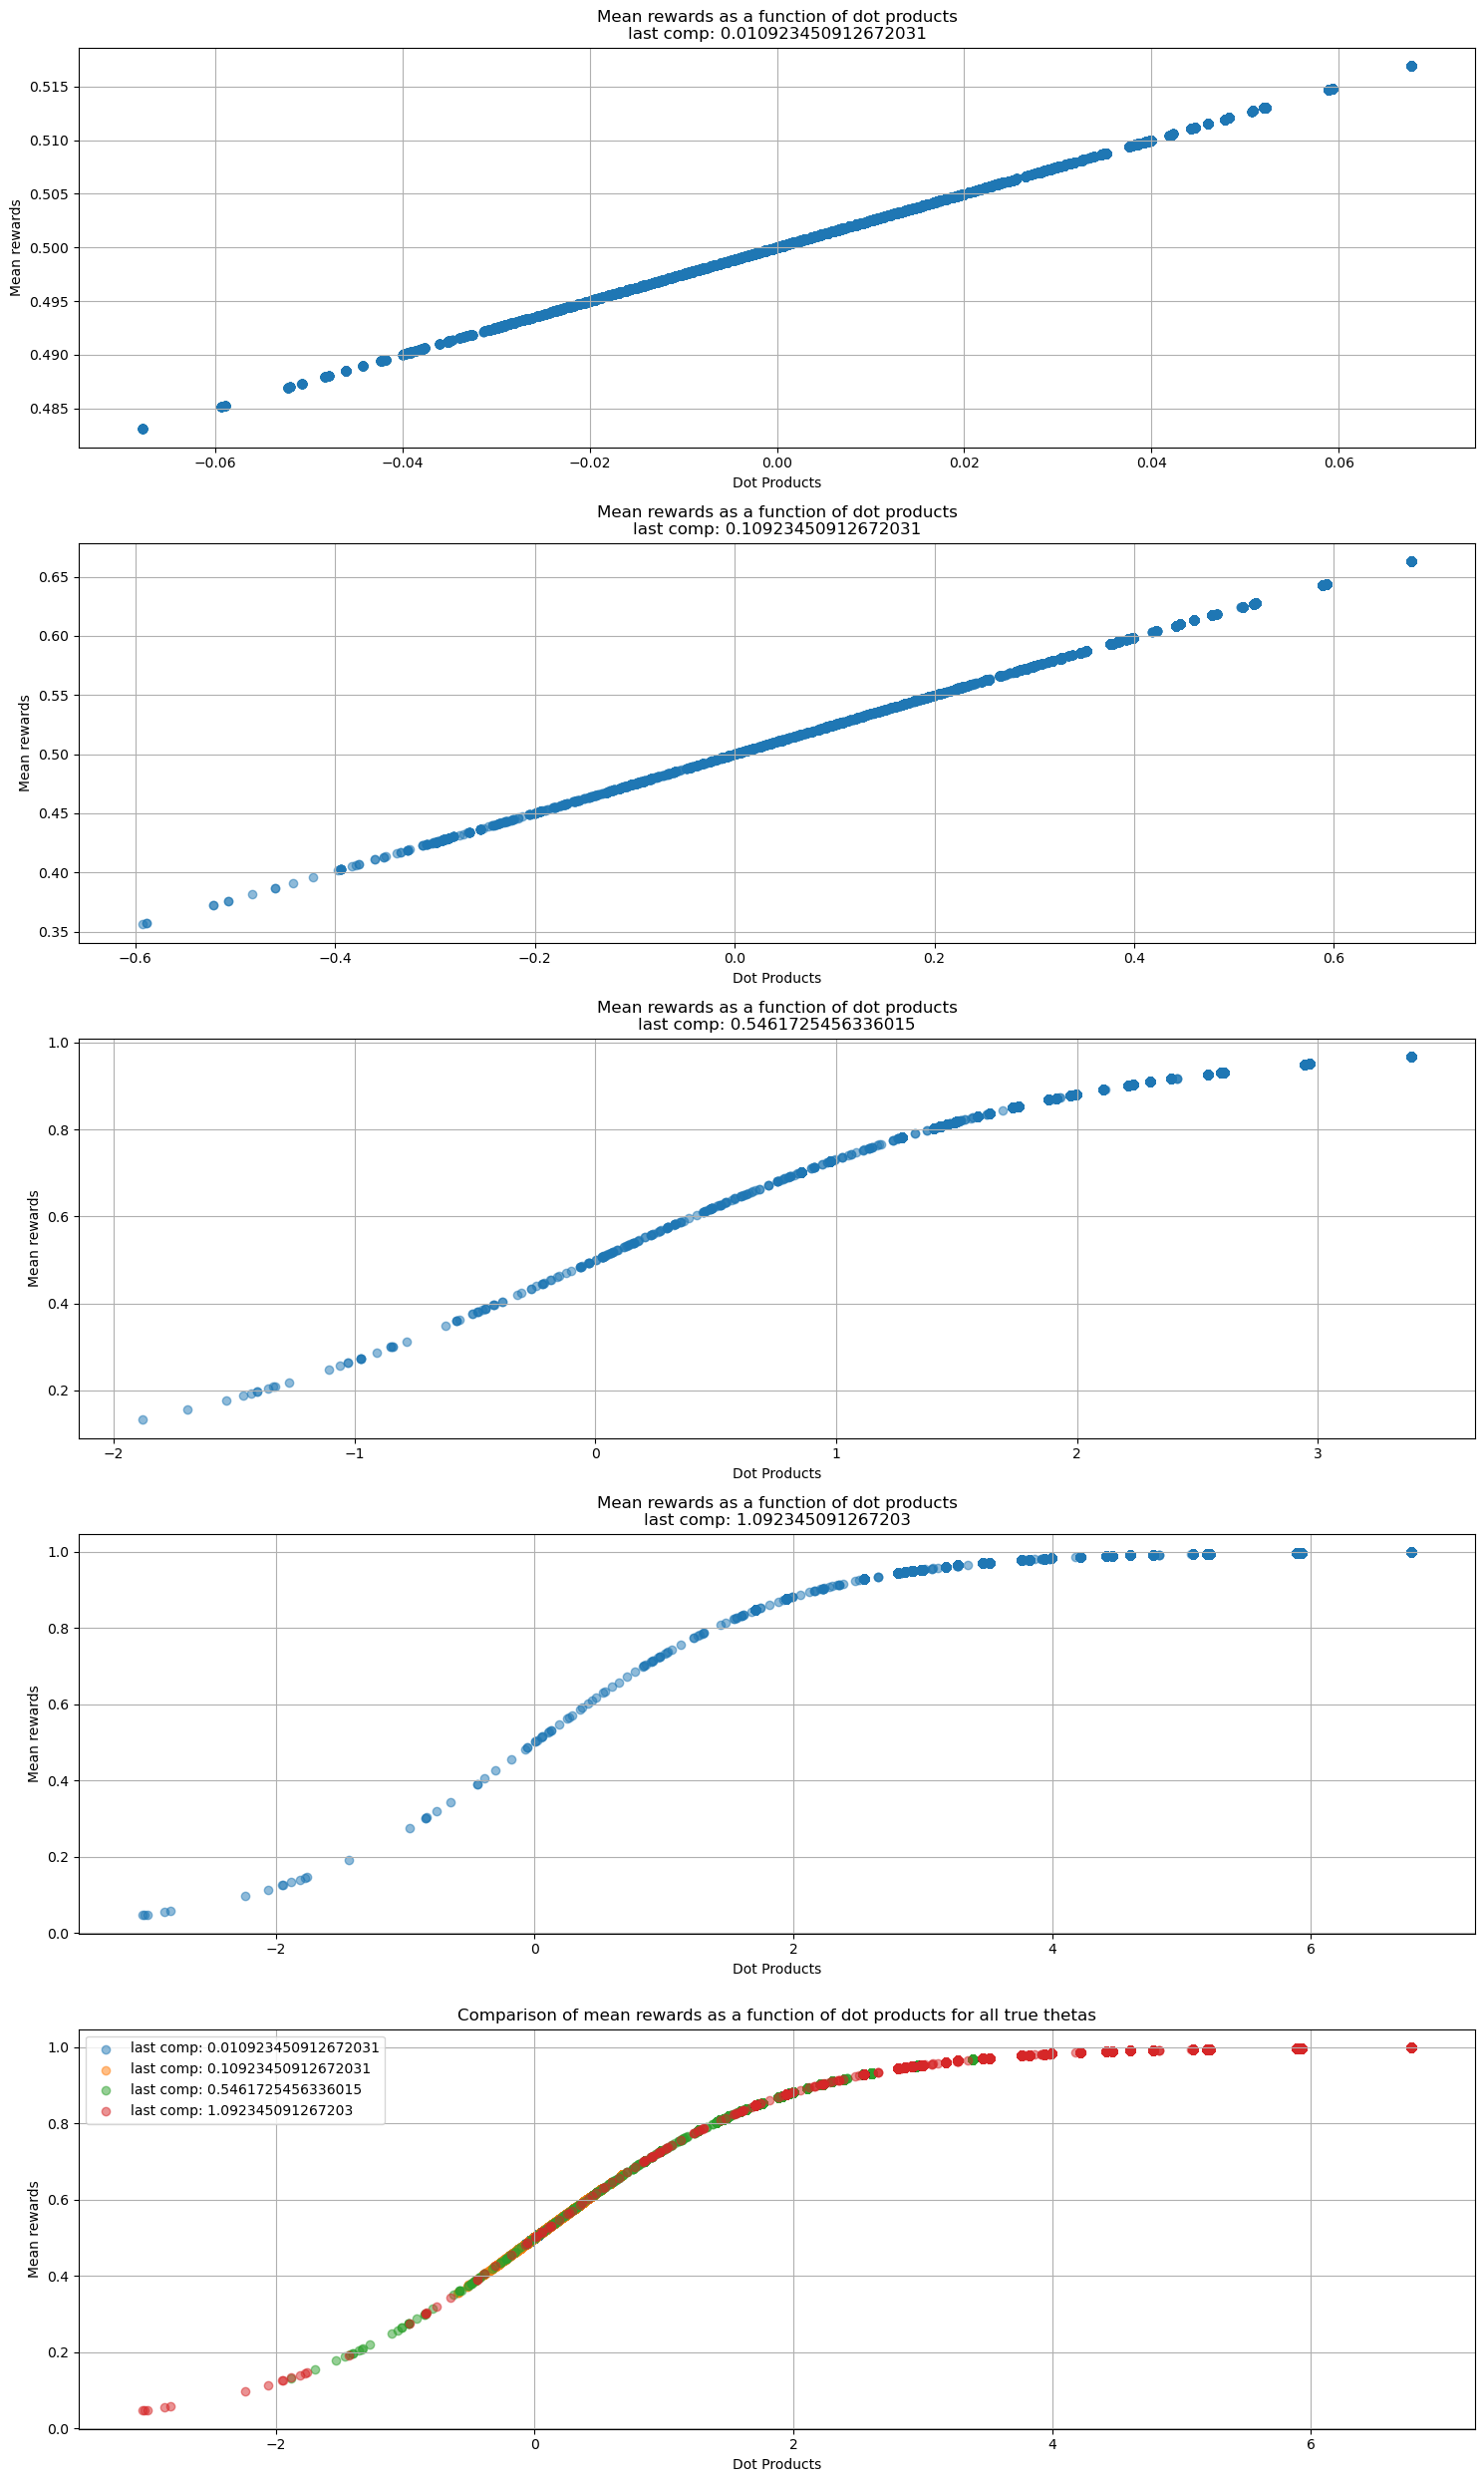

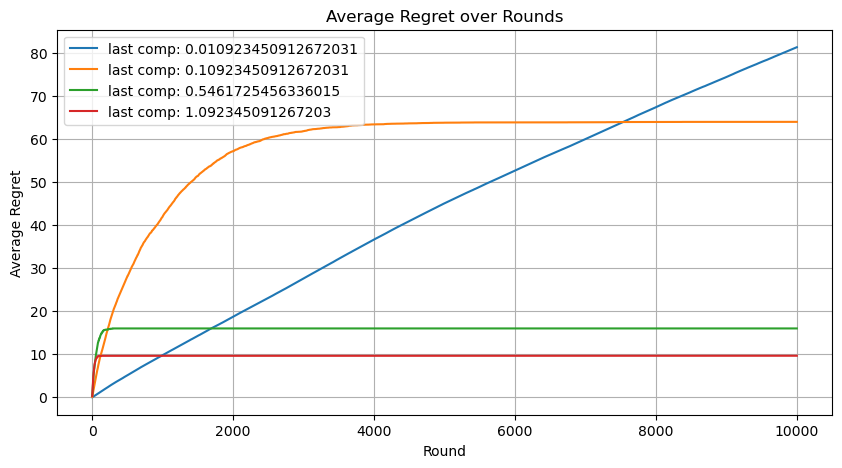

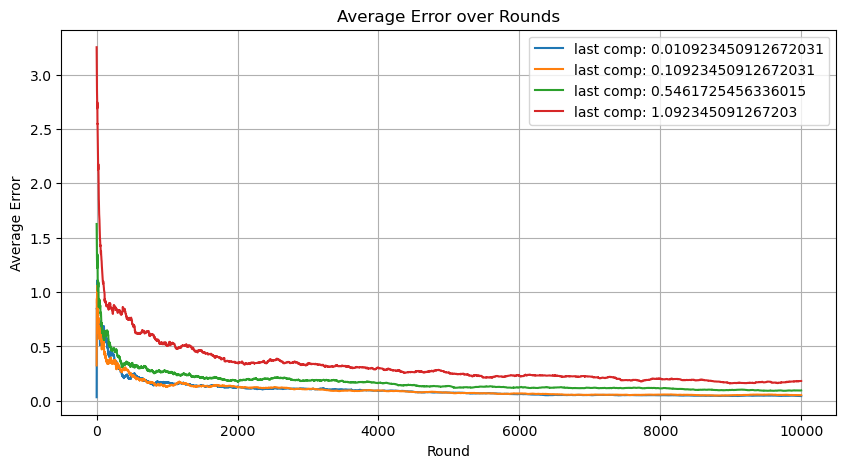

In [7]:
print(true_theta_array)
run_preference_experiment(d, item_features, true_theta_array, num_rounds, sigma_noise, nbr_runs=5, alpha=1, type = 'preference')